# General information

The below notebook was created to analyse the physicochemical properties of portuguese wines of Vinho Verde type(both red and white). The main goal is checking whether the alcohol is a function of other 10 variables and how strong is that relationship. This will enable us to predict the percentage of alcohol in a newly created batch. 


Datasource:

Paulo Cortez, University of Minho, Guimarães, Portugal, http://www3.dsi.uminho.pt/pcortez 
A. Cerdeira, F. Almeida, T. Matos and J. Reis, Viticulture Commission of the Vinho Verde Region(CVRVV), Porto, Portugal 
@2009


Attribute Information:

1 - fixed acidity 
2 - volatile acidity 
3 - citric acid 
4 - residual sugar 
5 - chlorides 
6 - free sulfur dioxide 
7 - total sulfur dioxide 
8 - density 
9 - pH 
10 - sulphates 
11 - alcohol 
13 - response (quality - score between 0 and 10)
12 - color

# Loading necessary packages and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
wine = pd.read_csv("wine.csv", comment="#")

Let's display first 5 rows and some information about our data.

In [3]:
wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,response,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,3,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,3,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,3,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,4,red
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,3,red


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
fixed.acidity           5320 non-null float64
volatile.acidity        5320 non-null float64
citric.acid             5320 non-null float64
residual.sugar          5320 non-null float64
chlorides               5320 non-null float64
free.sulfur.dioxide     5320 non-null float64
total.sulfur.dioxide    5320 non-null float64
density                 5320 non-null float64
pH                      5320 non-null float64
sulphates               5320 non-null float64
alcohol                 5320 non-null float64
response                5320 non-null int64
color                   5320 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB


Since the "color" variable is of the object type, we need to convert it into a categorical variable.

In [5]:
wine.color = wine.color.astype("category")
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
fixed.acidity           5320 non-null float64
volatile.acidity        5320 non-null float64
citric.acid             5320 non-null float64
residual.sugar          5320 non-null float64
chlorides               5320 non-null float64
free.sulfur.dioxide     5320 non-null float64
total.sulfur.dioxide    5320 non-null float64
density                 5320 non-null float64
pH                      5320 non-null float64
sulphates               5320 non-null float64
alcohol                 5320 non-null float64
response                5320 non-null int64
color                   5320 non-null category
dtypes: category(1), float64(11), int64(1)
memory usage: 504.1 KB


Now, let's display some statistical properties of our data.

In [6]:
wine.iloc[:, 0:11].describe().round(1).T.iloc[:, 1:]

,mean,std,min,25%,50%,75%,max
fixed.acidity,7.2,1.3,3.8,6.4,7.0,7.7,15.9
volatile.acidity,0.3,0.2,0.1,0.2,0.3,0.4,1.6
citric.acid,0.3,0.1,0.0,0.2,0.3,0.4,1.7
residual.sugar,5.0,4.5,0.6,1.8,2.7,7.5,65.8
chlorides,0.1,0.0,0.0,0.0,0.0,0.1,0.6
free.sulfur.dioxide,30.0,17.8,1.0,16.0,28.0,41.0,289.0
total.sulfur.dioxide,114.1,56.8,6.0,74.0,116.0,153.2,440.0
density,1.0,0.0,1.0,1.0,1.0,1.0,1.0
pH,3.2,0.2,2.7,3.1,3.2,3.3,4.0
sulphates,0.5,0.1,0.2,0.4,0.5,0.6,2.0


Let's count our wines and check how many of them are red.

In [7]:
wine.color.value_counts()

white    3961
red      1359
Name: color, dtype: int64

For further analysis we will focus on white wines since they constitute to about 75% of our observations.

In [8]:
white_wine = wine[wine.color == "white"]
white_wine = white_wine.iloc[:, 0:11]
white_wine.head()

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
1359,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8
1360,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5
1361,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1
1362,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9
1363,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6


Now, we will create 2 matrices: one for our independent variables(features) and second for the dependent variable(label).

In [9]:
y = white_wine.iloc[:, -1]
X = white_wine.iloc[:, :-1]

Let's calculate the Pearson correlation coefficient.

In [10]:
corr_P = white_wine.corr("pearson")
corr_P

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol
fixed.acidity,1.000000,-0.019214,0.298959,0.083620,0.024036,-0.058396,0.082425,0.266091,-0.431274,-0.017453,-0.110788
volatile.acidity,-0.019214,1.000000,-0.163228,0.098340,0.086287,-0.102471,0.102315,0.060603,-0.046954,-0.021150,0.046815
citric.acid,0.298959,-0.163228,1.000000,0.106269,0.132590,0.091681,0.122845,0.160076,-0.183015,0.049442,-0.076514
residual.sugar,0.083620,0.098340,0.106269,1.000000,0.076091,0.306835,0.409583,0.820498,-0.165997,-0.020503,-0.398167
chlorides,0.024036,0.086287,0.132590,0.076091,1.000000,0.101272,0.191145,0.253088,-0.090573,0.017871,-0.356928
free.sulfur.dioxide,-0.058396,-0.102471,0.091681,0.306835,0.101272,1.000000,0.619437,0.294638,-0.007750,0.037932,-0.251768
total.sulfur.dioxide,0.082425,0.102315,0.122845,0.409583,0.191145,0.619437,1.000000,0.536868,0.008239,0.136544,-0.446643
density,0.266091,0.060603,0.160076,0.820498,0.253088,0.294638,0.536868,1.000000,-0.063734,0.082048,-0.760162
pH,-0.431274,-0.046954,-0.183015,-0.165997,-0.090573,-0.007750,0.008239,-0.063734,1.000000,0.142353,0.093095
sulphates,-0.017453,-0.021150,0.049442,-0.020503,0.017871,0.037932,0.136544,0.082048,0.142353,1.000000,-0.022850


As a next step we will create a triangular matrix and display the coefficients greater than 0.5

In [11]:
corr_P_tri = corr_P.where(np.triu(np.ones(corr_P.shape, dtype=np.bool), k=1)).stack().sort_values()
corr_P_tri[abs(corr_P_tri)>0.5]


density               alcohol                -0.760162
total.sulfur.dioxide  density                 0.536868
free.sulfur.dioxide   total.sulfur.dioxide    0.619437
residual.sugar        density                 0.820498
dtype: float64

Now, let's plot pairwise relationships in our dataset and then we will move towards applying machine learning algorithms.

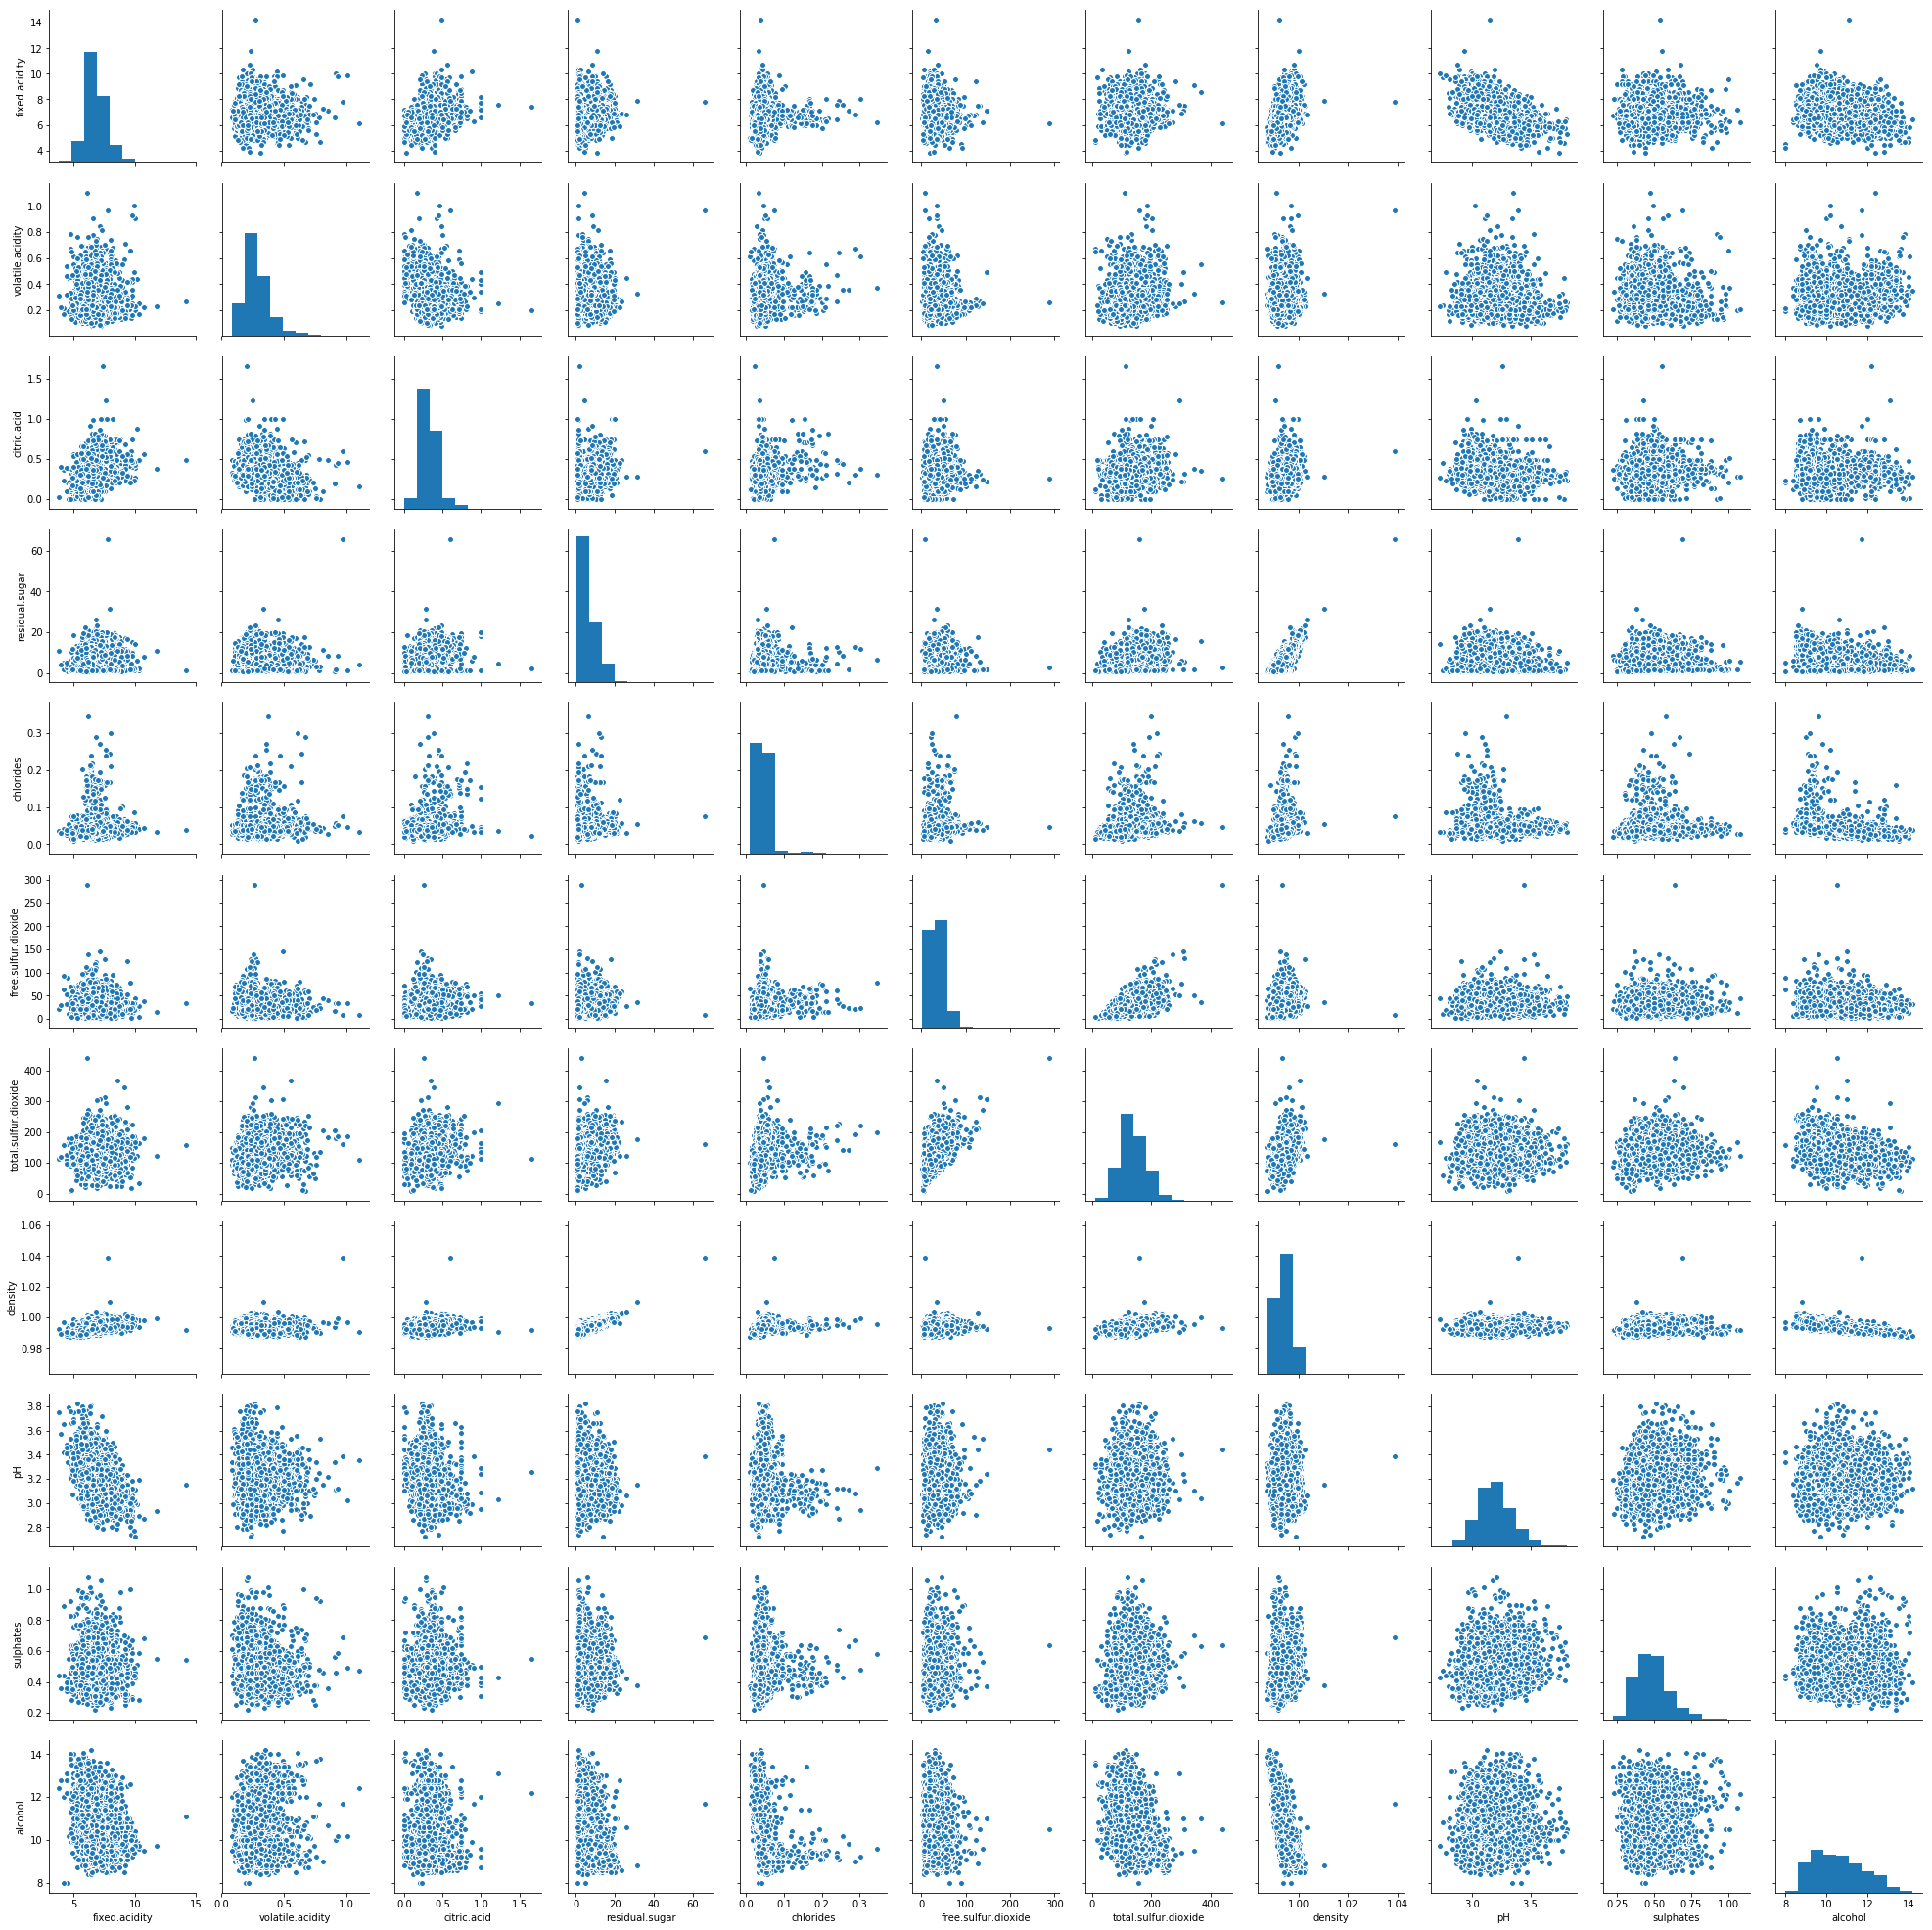

In [12]:
sns.pairplot(white_wine)
plt.show()

In [13]:
import sklearn.linear_model
ols = sklearn.linear_model.LinearRegression()

#Fitting model to our data
ols.fit(X,y)

#Displaying the intercept
ols.intercept_

680.70903903326428

In [14]:
#Displaying the coefficients of our Linear Regressor
ols.coef_

array([  5.08985834e-01,   8.91433570e-01,   4.16880125e-01,
         2.42749178e-01,  -3.94341133e-01,  -3.33635324e-03,
         2.79786508e-04,  -6.87861040e+02,   2.42818063e+00,
         1.01964556e+00])

In [25]:
y_pred = ols.predict(X)
r2 = ols.score(X,y)
r2

0.8580656118411002

The first Machine Learning algorithm that we applied to our dataset was Linear Regression. According to the coefficient of determination(r2 variable), the model we've built explains 85% of the variance in the dependent variable(alcohol).
To have a general overview of the model's efficiency, we can also check other statistics like MSE(mean squared error) and MAE(mean absolute error). 